<a href="https://colab.research.google.com/github/HwangHanJae/datascience-basic-tect/blob/main/seaborn_kdeplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [10]:
#라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [11]:
#그래프가 잘보이게 하기 위해 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이게 하기위하여
set_matplotlib_formats('svg')

###kdeplot - 커널밀도함수

###kdeplot 실습에 사용할 데이터
- tips
 - total_bill(float64) : 최종 금액
 - tip(float64) : 팁
 - sex(category) : 성별
 - smoker(category) : 흡연자/비흡연자
 - day(category) : 요일(Sun/Sat/Thur/Fri)
 - time(category) : 시간(Dinner/Lunch)
 - size(int64) : 인원(1~6)
- iris
 - sepal_length(float64) : 꽃받침 길이
 - sepal_width(float64) : 꽃받침 너비
 - petal_length(float64) : 꽃잎 길이
 - petal_width(float64) : 꽃잎 너비
 - species(object) : 종

####tips

In [5]:
#데이터 로드하기
tips = sns.load_dataset('tips')

In [6]:
#데이터 정보
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [7]:
#데이터 수치적 요약
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
#데이터 범주적 요약
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


####iris

In [14]:
#데이터 로드하기
iris = sns.load_dataset('iris')

In [15]:
#데이터 정보
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
#데이터의 수치적 요약
iris.describe(include=np.number)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
#데이터 범주적 요약
iris.describe(include='object')

,species
count,150
unique,3
top,setosa
freq,50


####그래프 확인

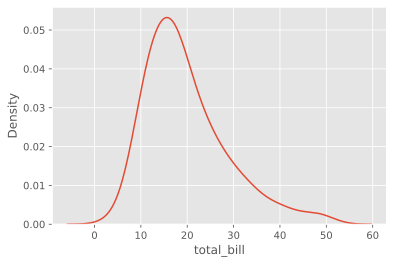

In [12]:
sns.kdeplot(data=tips, x='total_bill')

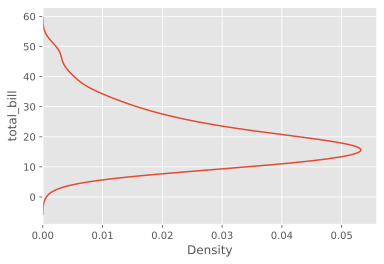

In [13]:
#y축으로 그리기
sns.kdeplot(data=tips, y='total_bill')

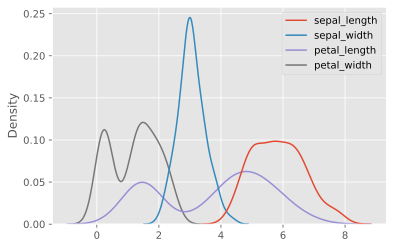

In [18]:
#data에만 할당하면 와이드 형식의 데이터셋의 각 열에 대한 분포를 그림
sns.kdeplot(data=iris)

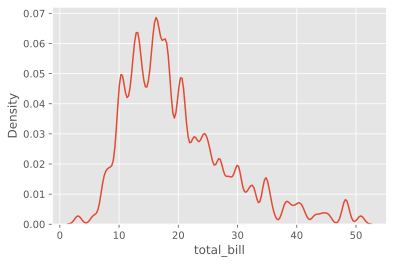

In [20]:
#use less smoothing
sns.kdeplot(data=tips, x='total_bill', bw_adjust=.2)

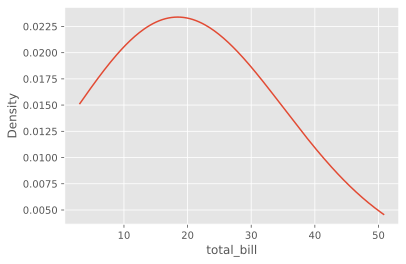

In [22]:
#use more smoothing
sns.kdeplot(data=tips, x='total_bill', bw_adjust=5, cut=0)

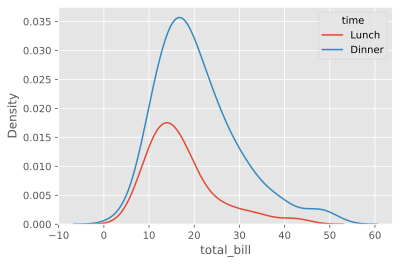

In [23]:
#hue 옵션 사용
sns.kdeplot(data=tips, x='total_bill', hue='time')

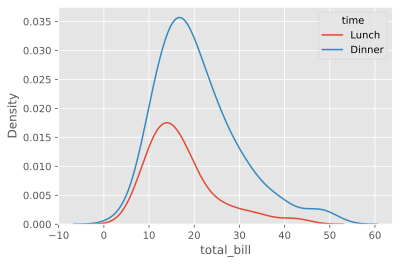

In [25]:
#multiple 옵션 사용
#layer가 기본값
sns.kdeplot(data=tips, x='total_bill', hue='time', multiple="layer")

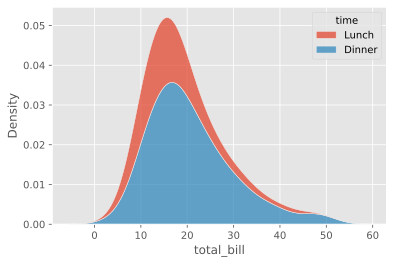

In [26]:
#multiple 옵션 사용
#stack 기본값
sns.kdeplot(data=tips, x='total_bill', hue='time', multiple="stack")

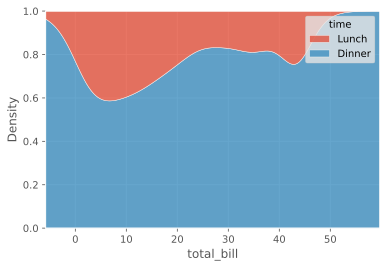

In [27]:
#multiple 옵션 사용
#fill 기본값
#누적분포를 정규화함
sns.kdeplot(data=tips, x='total_bill', hue='time', multiple="fill")

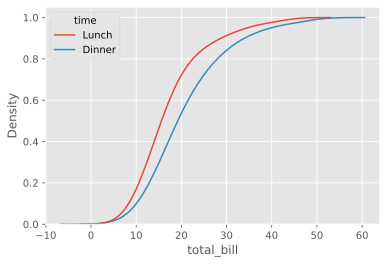

In [29]:
#누적 분포 함수를 추정하여 정규화 함
#cumulative = 누적

sns.kdeplot(data=tips, x='total_bill', hue='time',
            cumulative=True, common_norm =False, common_grid = False)

In [33]:
#groupby를 사용 tips_agg 데이터 프레임을 생성
tips_agg = tips.groupby('size').agg(total_bill=('total_bill', 'mean'), n=('total_bill', 'count'))
tips_agg

,total_bill,n
size,,
1,7.242500,4
2,16.448013,156
3,23.277632,38
4,28.613514,37
5,30.068000,5
6,34.830000,4


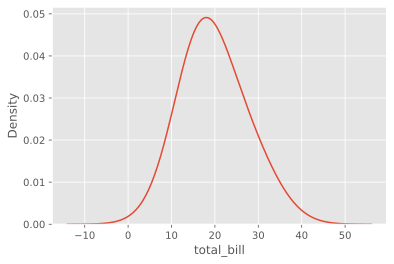

In [34]:
#가중치를 사용하여 집계된 데이터에서 분포를 추정
sns.kdeplot(data=tips_agg, x='total_bill', weights='n')

In [ ]:
#로그 스케일링을 사용하여 데이터 변수를 맵핑
